In [7]:
#load libraries
import numpy
from numpy import arange
from pandas import read_csv
from pandas import set_option
#import matplotlib.pyplot as plt
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import Ridge
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [95]:
filename = 'Boston.csv'
names = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","black","lstat","medv"]
data = read_csv(filename,delimiter=',',skiprows=1, names = names)
#data = read_csv(filename,delim_whitespace=False)#, names=names)
print(data.head())
df = data.values
#print(df)


      crim    zn  indus  chas  nox   rm   age  dis  rad  tax  ptratio  black  \
1  6.3e-03  18.0    2.3     0  0.5  6.6  65.2  4.1    1  296     15.3  396.9   
2  2.7e-02   0.0    7.1     0  0.5  6.4  78.9  5.0    2  242     17.8  396.9   
3  2.7e-02   0.0    7.1     0  0.5  7.2  61.1  5.0    2  242     17.8  392.8   
4  3.2e-02   0.0    2.2     0  0.5  7.0  45.8  6.1    3  222     18.7  394.6   
5  6.9e-02   0.0    2.2     0  0.5  7.1  54.2  6.1    3  222     18.7  396.9   

   lstat  medv  
1    5.0  24.0  
2    9.1  21.6  
3    4.0  34.7  
4    2.9  33.4  
5    5.3  36.2  


In [35]:
data.shape

(506, 14)

In [44]:
set_option('precision',1)
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,5.1e+02,506.0,506.0,5.1e+02,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0,506.0
mean,3.6e+00,11.4,11.1,6.9e-02,0.6,6.3,68.6,3.8,9.5,408.2,18.5,356.7,12.7,22.5
std,8.6e+00,23.3,6.9,2.5e-01,0.1,0.7,28.1,2.1,8.7,168.5,2.2,91.3,7.1,9.2
min,6.3e-03,0.0,0.5,0.0e+00,0.4,3.6,2.9,1.1,1.0,187.0,12.6,0.3,1.7,5.0
25%,8.2e-02,0.0,5.2,0.0e+00,0.4,5.9,45.0,2.1,4.0,279.0,17.4,375.4,6.9,17.0
50%,2.6e-01,0.0,9.7,0.0e+00,0.5,6.2,77.5,3.2,5.0,330.0,19.1,391.4,11.4,21.2
75%,3.7e+00,12.5,18.1,0.0e+00,0.6,6.6,94.1,5.2,24.0,666.0,20.2,396.2,17.0,25.0
max,8.9e+01,100.0,27.7,1.0e+00,0.9,8.8,100.0,12.1,24.0,711.0,22.0,396.9,38.0,50.0


In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 1 to 506
Data columns (total 14 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rm         506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
black      506 non-null float64
lstat      506 non-null float64
medv       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [36]:
data.head(15)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
8,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
9,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
10,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [46]:
data.corr()
#here we can see that nox and indus, dis and indus, tax and indus, age and nox, dis and nox are highly corelated

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.0e+00,-2.0e-01,4.1e-01,-5.6e-02,4.2e-01,-2.2e-01,3.5e-01,-3.8e-01,6.3e-01,5.8e-01,0.3,-3.9e-01,4.6e-01,-0.4
zn,-2.0e-01,1.0e+00,-5.3e-01,-4.3e-02,-5.2e-01,3.1e-01,-5.7e-01,6.6e-01,-3.1e-01,-3.1e-01,-0.4,1.8e-01,-4.1e-01,0.4
indus,4.1e-01,-5.3e-01,1.0e+00,6.3e-02,7.6e-01,-3.9e-01,6.4e-01,-7.1e-01,6.0e-01,7.2e-01,0.4,-3.6e-01,6.0e-01,-0.5
chas,-5.6e-02,-4.3e-02,6.3e-02,1.0e+00,9.1e-02,9.1e-02,8.7e-02,-9.9e-02,-7.4e-03,-3.6e-02,-0.1,4.9e-02,-5.4e-02,0.2
nox,4.2e-01,-5.2e-01,7.6e-01,9.1e-02,1.0e+00,-3.0e-01,7.3e-01,-7.7e-01,6.1e-01,6.7e-01,0.2,-3.8e-01,5.9e-01,-0.4
rm,-2.2e-01,3.1e-01,-3.9e-01,9.1e-02,-3.0e-01,1.0e+00,-2.4e-01,2.1e-01,-2.1e-01,-2.9e-01,-0.4,1.3e-01,-6.1e-01,0.7
age,3.5e-01,-5.7e-01,6.4e-01,8.7e-02,7.3e-01,-2.4e-01,1.0e+00,-7.5e-01,4.6e-01,5.1e-01,0.3,-2.7e-01,6.0e-01,-0.4
dis,-3.8e-01,6.6e-01,-7.1e-01,-9.9e-02,-7.7e-01,2.1e-01,-7.5e-01,1.0e+00,-4.9e-01,-5.3e-01,-0.2,2.9e-01,-5.0e-01,0.2
rad,6.3e-01,-3.1e-01,6.0e-01,-7.4e-03,6.1e-01,-2.1e-01,4.6e-01,-4.9e-01,1.0e+00,9.1e-01,0.5,-4.4e-01,4.9e-01,-0.4
tax,5.8e-01,-3.1e-01,7.2e-01,-3.6e-02,6.7e-01,-2.9e-01,5.1e-01,-5.3e-01,9.1e-01,1.0e+00,0.5,-4.4e-01,5.4e-01,-0.5


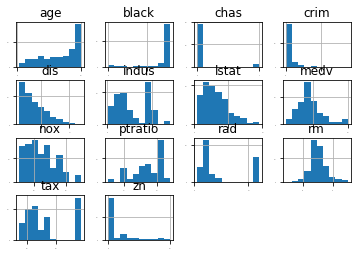

In [56]:
data.hist(sharex=False, sharey= False, xlabelsize=1,ylabelsize=1)
pyplot.show()

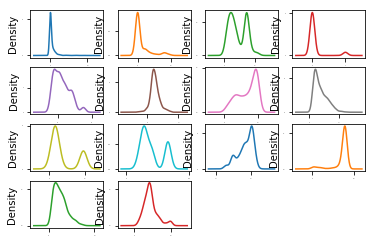

In [57]:
data.plot(kind='density',subplots=True, layout = (4,4),sharex = False, legend = False,fontsize=1)
pyplot.show()

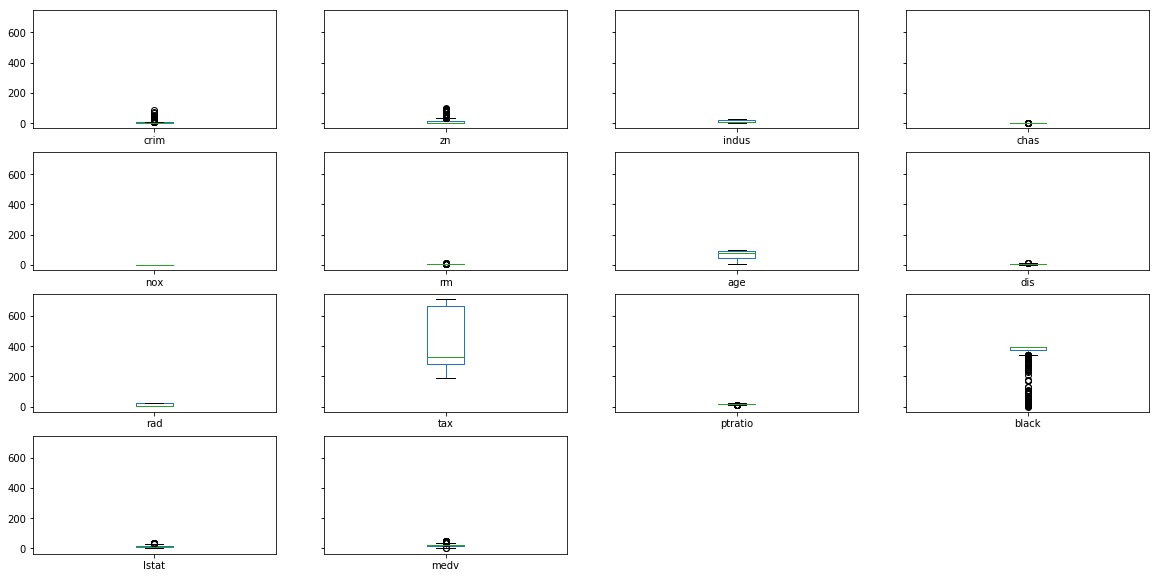

In [61]:
data.plot(kind='box',subplots=True,layout=(4,4),sharex=False, sharey=True,fontsize=10,figsize=(20,10))
pyplot.show()

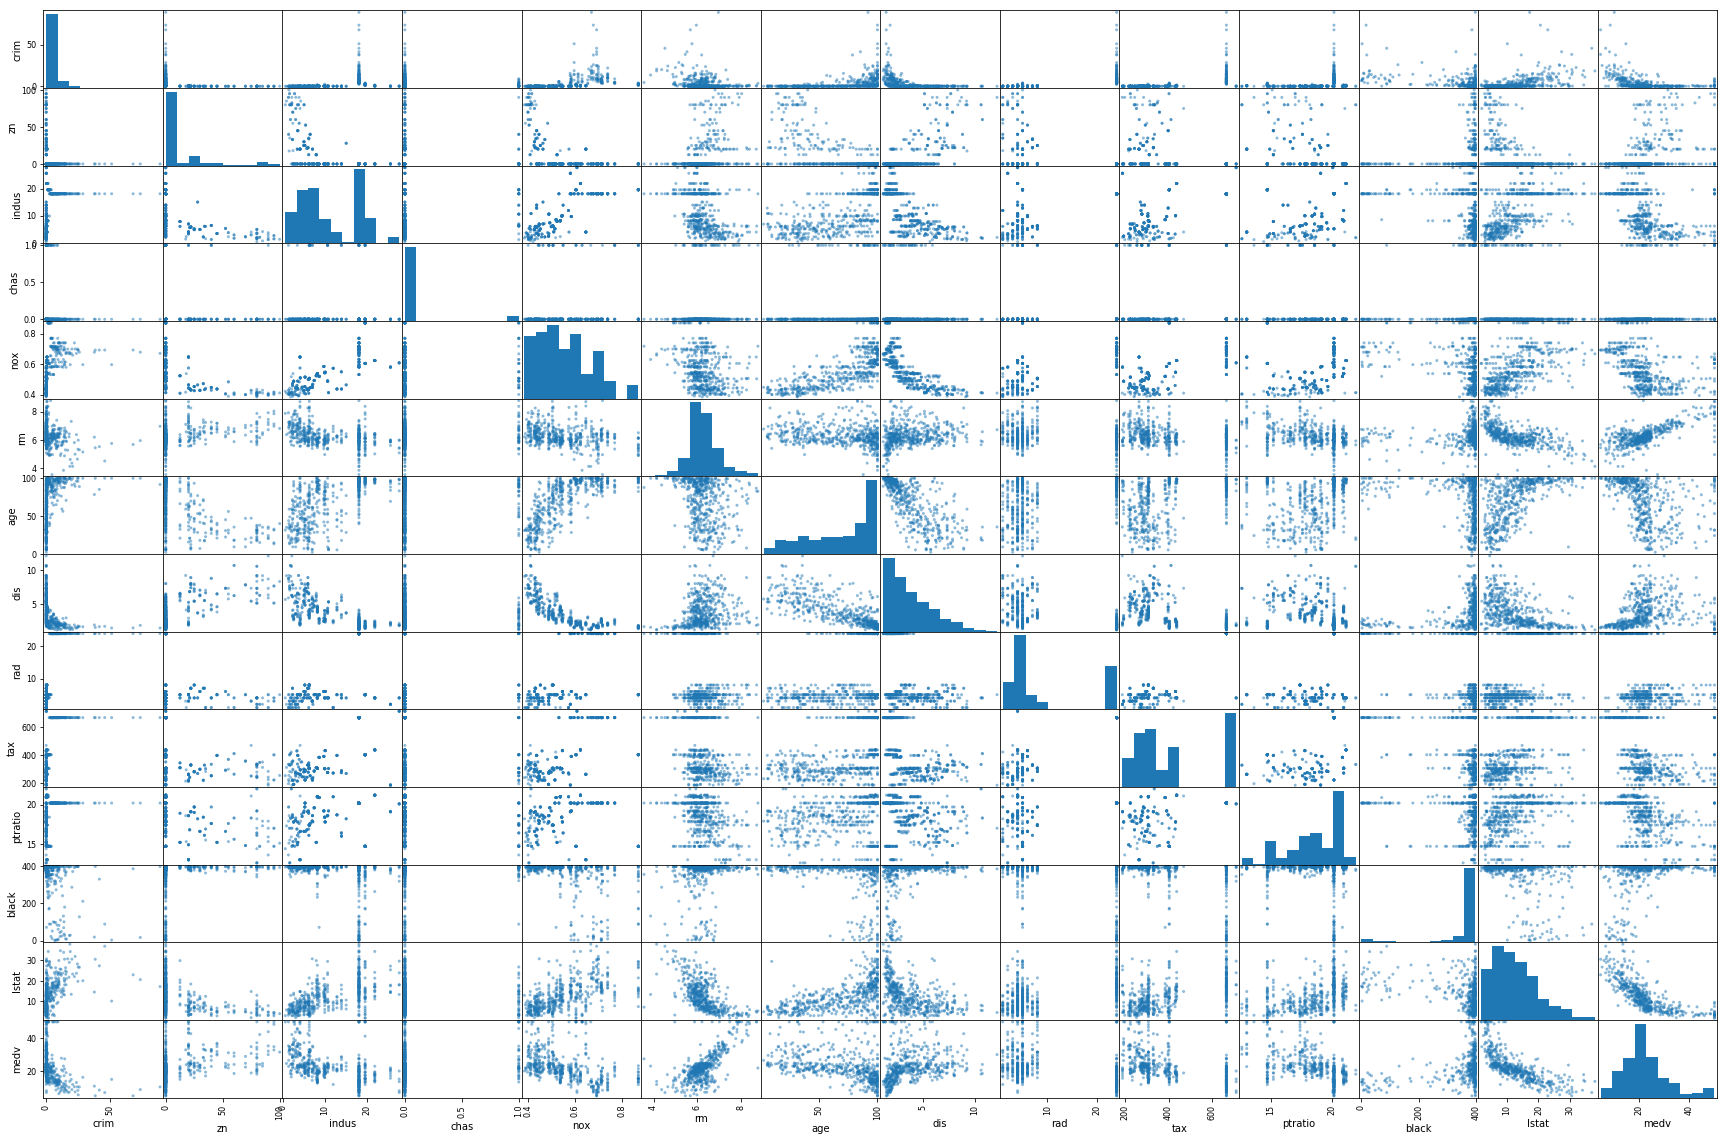

In [70]:
scatter_matrix(data,figsize=(30,20))
pyplot.show()

[Text(0, 0, 'crim'),
 Text(0, 0, 'zn'),
 Text(0, 0, 'indus'),
 Text(0, 0, 'chas'),
 Text(0, 0, 'nox'),
 Text(0, 0, 'rm'),
 Text(0, 0, 'age'),
 Text(0, 0, 'dis'),
 Text(0, 0, 'rad'),
 Text(0, 0, 'tax'),
 Text(0, 0, 'ptratio'),
 Text(0, 0, 'black'),
 Text(0, 0, 'lstat'),
 Text(0, 0, 'medv')]

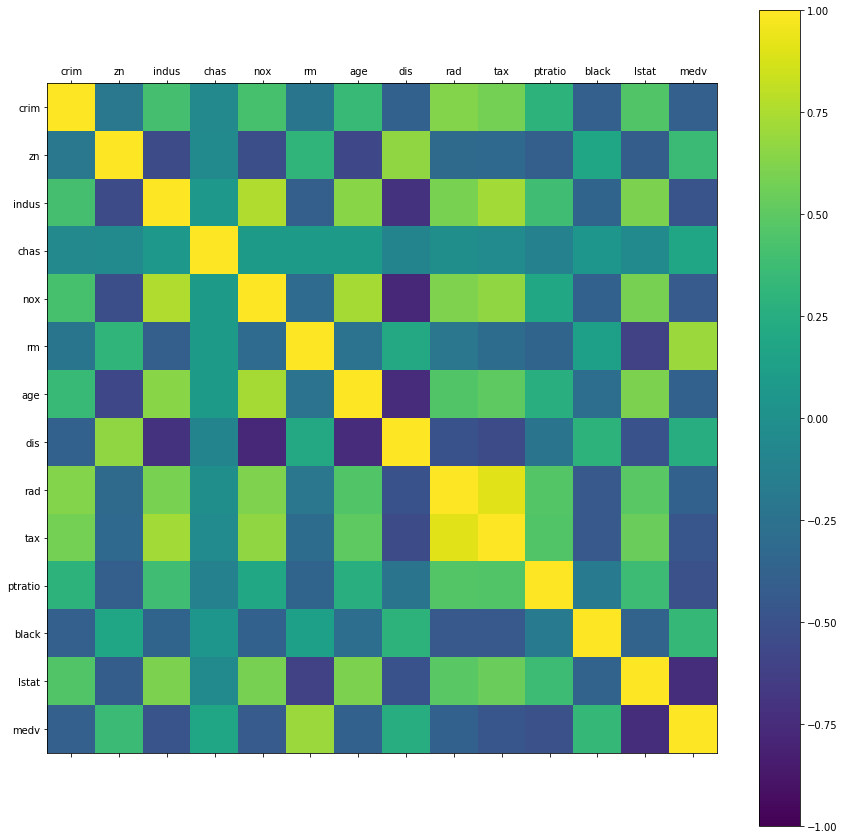

In [80]:
#correlation matrix
fig = pyplot.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(),vmin=-1,vmax=1,interpolation='none')
fig.colorbar(cax)
ticks=numpy.arange(0,14,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)

In [87]:
import pandas as pd
import numpy as np
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1,-0.2,0.41,-0.056,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
zn,-0.2,1,-0.53,-0.043,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
indus,0.41,-0.53,1,0.063,0.76,-0.39,0.64,-0.71,0.6,0.72,0.38,-0.36,0.6,-0.48
chas,-0.056,-0.043,0.063,1,0.091,0.091,0.087,-0.099,-0.0074,-0.036,-0.12,0.049,-0.054,0.18
nox,0.42,-0.52,0.76,0.091,1,-0.3,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
rm,-0.22,0.31,-0.39,0.091,-0.3,1,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.7
age,0.35,-0.57,0.64,0.087,0.73,-0.24,1,-0.75,0.46,0.51,0.26,-0.27,0.6,-0.38
dis,-0.38,0.66,-0.71,-0.099,-0.77,0.21,-0.75,1,-0.49,-0.53,-0.23,0.29,-0.5,0.25
rad,0.63,-0.31,0.6,-0.0074,0.61,-0.21,0.46,-0.49,1,0.91,0.46,-0.44,0.49,-0.38
tax,0.58,-0.31,0.72,-0.036,0.67,-0.29,0.51,-0.53,0.91,1,0.46,-0.44,0.54,-0.47


In [105]:
X = df[:,0:13]
y = df[:,13]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.20,random_state=7)
models = []
models.append(('LR',LinearRegression()))
models.append(('Lasso',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
#each evaluate mmodel in turn
results=[]
names=[]
scoring='neg_mean_squared_error'
for name,model in models:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)

print("Here we can see that LR doing better")

LR: -21.379856 (9.414264)
Lasso: -26.423561 (11.651110)
KNN: -41.896488 (13.901688)
CART: -24.617292 (13.078099)
EN: -27.502259 (12.305022)
SVM: -67.827886 (29.049138)
Here we can see that EN doing better


C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. 

In [106]:
#standardize the dataset
pipelines=[]
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),("LR", LinearRegression())])))
pipelines.append(('ScaledLasso', Pipeline([('Scaler', StandardScaler()),("Lasso", Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),("EN", ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),("KNN", KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),("CART", DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler', StandardScaler()),("SVR", SVR())])))
#pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),("SVR", LinearRegression())])))

results = []
names = []
for name,model in pipelines:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)


C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. 

ScaledLR: -21.379856 (9.414264)
ScaledLasso: -26.607314 (8.978761)
ScaledEN: -27.932372 (10.587490)
ScaledKNN: -20.107620 (12.376949)
ScaledCART: -26.971234 (12.722923)
ScaledSVR: -29.633086 (17.009186)


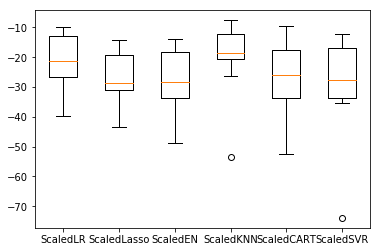

In [108]:
fig = pyplot.figure()
#fig.subtitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [112]:
# KNN algorithm tunning
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid = dict(n_neighbors=k_values)
model = KNeighborsRegressor()
kfold = KFold(n_splits=10,random_state=7)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,y_train)
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev, param))

Best: -18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [113]:
ensembles=[]
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),("AB", AdaBoostRegressor())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),("GBM",GradientBoostingRegressor())])))
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),("RF", RandomForestRegressor())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),("ET", ExtraTreesRegressor())])))
results = []
names = []
for name,model in ensembles:
    kfold = KFold(n_splits=10,random_state=7)
    cv_results = cross_val_score(model,X_train,y_train,cv=kfold,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" %(name,cv_results.mean(),cv_results.std())
    print(msg)


C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledAB: -15.168169 (6.232344)


C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledGBM: -10.362254 (4.782515)


C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledRF: -11.900957 (6.444625)


C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ScaledET: -9.083236 (5.050748)


In [114]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
k_values = numpy.array([50,100,150,200,250,300,350,400])
param_grid = dict(n_estimators=k_values)
model = GradientBoostingRegressor()
kfold = KFold(n_splits=10,random_state=7)
grid = GridSearchCV(estimator=model,param_grid=param_grid,scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledX,y_train)
print("Best: %f using %s" %(grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
    print("%f (%f) with: %r" %(mean,stdev, param))

C:\Users\sagR\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Best: -9.282520 using {'n_estimators': 250}
-10.575386 (4.572736) with: {'n_estimators': 50}
-10.046295 (4.391974) with: {'n_estimators': 100}
-9.678184 (4.316213) with: {'n_estimators': 150}
-9.615199 (4.313575) with: {'n_estimators': 200}
-9.282520 (4.252418) with: {'n_estimators': 250}
-9.287100 (4.185972) with: {'n_estimators': 300}
-9.511328 (4.276296) with: {'n_estimators': 350}
-9.303260 (4.341828) with: {'n_estimators': 400}


In [115]:
#Finalize model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = GradientBoostingRegressor(random_state=7,n_estimators=250)
model.fit(rescaledX,y_train)
rescaledvalidationX = scaler.transform(X_test)
pred = model.predict(rescaledvalidationX)
print(mean_squared_error(y_test,pred))

11.585658327248112
